# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [1]:

# Your code to import all the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix, ConfusionMatrixDisplay


# Read and display dataset.

In [2]:
# Your code to read data
dataset = pd.read_csv('student_performances.csv')

dataset.head(10)
# Your code to print first few samples of the dataset.

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory
5,M,16,U,LE3,T,4,3,services,other,reputation,...,yes,no,5,4,2,1,2,5,10,very good
6,M,16,U,LE3,T,2,2,other,other,home,...,yes,no,4,4,4,1,1,3,0,satisfactory
7,F,17,U,GT3,A,4,4,other,teacher,home,...,no,no,4,1,4,1,1,1,6,poor
8,M,15,U,LE3,A,3,2,services,other,home,...,yes,no,4,2,2,1,1,1,0,excellent
9,M,15,U,GT3,T,3,4,other,other,home,...,yes,no,5,5,1,1,1,5,0,very good


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [3]:
# Your code to print the key information about the datset. Use - .info method.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

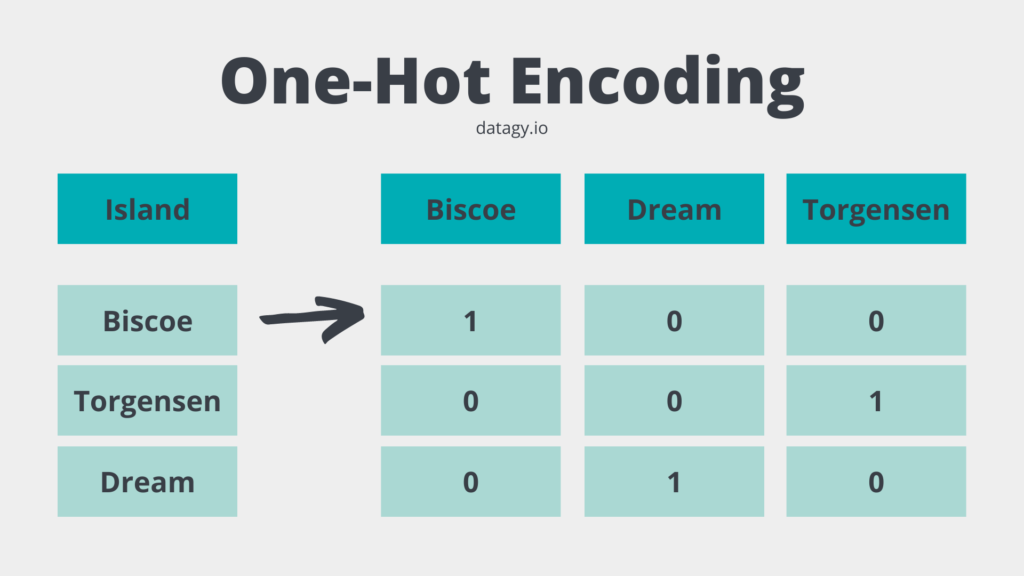

In [4]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'],dtype=int)
data.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
5,M,16,U,LE3,T,4,3,1,2,0,...,0,1,0,0,0,0,1,0,1,0
6,M,16,U,LE3,T,2,2,1,2,0,...,1,0,0,0,1,0,0,0,1,0
7,F,17,U,GT3,A,4,4,2,2,0,...,1,0,0,0,1,0,0,0,1,0
8,M,15,U,LE3,A,3,2,1,2,0,...,0,1,0,0,1,0,0,0,1,0
9,M,15,U,GT3,T,3,4,1,2,0,...,1,0,0,0,1,0,0,0,1,0


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [5]:
# Your code to print first few rows of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    object
 1   age                395 non-null    int64 
 2   address            395 non-null    object
 3   famsize            395 non-null    object
 4   Pstatus            395 non-null    object
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    object
 11  famsup             395 non-null    object
 12  paid               395 non-null    object
 13  activities         395 non-null    object
 14  nursery            395 non-null    object
 15  higher             395 non-null    object
 16  internet           395 non-null    object
 1

# Converting other text values in the dataframe to numbers using label encoding.

In [6]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#
labelencoder.fit(data['address'])
data ['address'] = labelencoder.transform(data['address'])


#
## Your code to convert transform famsize to the numbers
#
labelencoder.fit(data['famsize'])
data ['famsize'] = labelencoder.transform(data['famsize'])


#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data ['Pstatus'] = labelencoder.transform(data['Pstatus'])

#
## Your code to convert transform schoolsup to the numbers
#
labelencoder.fit(data['schoolsup'])
data ['schoolsup'] = labelencoder.transform(data['schoolsup'])


#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data ['famsup'] = labelencoder.transform(data['famsup'])


#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data ['paid'] = labelencoder.transform(data['paid'])


#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data ['activities'] = labelencoder.transform(data['activities'])

#
## Your code to convert transform nursery to the numbers
#
labelencoder.fit(data['nursery'])
data ['nursery'] = labelencoder.transform(data['nursery'])


#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data ['higher'] = labelencoder.transform(data['higher'])

#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data ['internet'] = labelencoder.transform(data['internet'])

#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data ['romantic'] = labelencoder.transform(data['romantic'])

# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [7]:
labelencoder = LabelEncoder()
cols=['sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for label in cols:
    labelencoder.fit(data[label])
    data [label] = labelencoder.transform(data[label])


In [8]:
# Your code to print first few samples of the data.
data.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
5,1,16,1,1,1,4,3,1,2,0,...,0,1,0,0,0,0,1,0,1,0
6,1,16,1,1,1,2,2,1,2,0,...,1,0,0,0,1,0,0,0,1,0
7,0,17,1,0,0,4,4,2,2,0,...,1,0,0,0,1,0,0,0,1,0
8,1,15,1,1,0,3,2,1,2,0,...,0,1,0,0,1,0,0,0,1,0
9,1,15,1,0,1,3,4,1,2,0,...,1,0,0,0,1,0,0,0,1,0


In [9]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [10]:
# Your code to get X from data
X=data.drop('grades',axis=1).values
# Your code to get y from data
y=data['grades'].values
data['grades'].value_counts()

grades
poor            130
satisfactory    103
good             62
very good        60
excellent        40
Name: count, dtype: int64

In [11]:
labelencoder.fit(y)
y = labelencoder.transform(y)

# Print shapes of X and y to make sure everything is good

In [12]:
# Print shape of X
print(X.shape)
# Print shape of y
print(y.shape)
# Print X
print(X)
# Print y
print(y)

(395, 42)
(395,)
[[ 0 18  1 ...  0  1  0]
 [ 0 17  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 ...
 [ 1 21  0 ...  0  0  1]
 [ 1 18  0 ...  0  1  0]
 [ 1 19  1 ...  1  0  0]]
[2 2 3 4 3 4 3 2 0 4 2 1 4 3 0 4 4 3 2 3 4 4 0 1 2 2 3 4 3 3 1 0 0 1 4 2 0
 4 3 1 3 1 0 3 2 2 3 0 4 2 1 1 3 3 1 3 4 4 2 0 3 3 2 2 3 4 1 2 2 0 4 3 2 4
 3 3 3 3 3 2 1 3 2 4 3 2 2 4 3 2 2 0 2 3 4 3 4 3 4 2 2 0 4 2 0 3 2 0 1 0 0
 3 1 0 2 0 4 1 2 1 4 4 1 1 2 1 3 2 2 0 2 2 1 3 2 2 2 2 1 4 2 2 3 1 2 3 2 3
 2 3 2 4 3 2 1 2 1 3 4 1 2 2 2 3 2 1 3 0 2 4 2 0 3 2 2 2 3 2 2 3 2 1 0 2 1
 3 3 4 2 3 1 2 2 3 4 4 0 3 0 3 0 3 3 2 3 2 2 1 3 2 2 1 4 2 3 4 2 2 2 3 2 2
 0 1 4 2 4 1 2 1 4 3 2 1 2 3 1 1 3 2 1 1 2 1 2 0 1 2 2 4 2 3 2 2 1 2 1 3 4
 2 0 2 1 2 2 0 3 3 3 2 2 4 3 4 3 1 2 2 2 3 2 3 1 3 3 3 0 1 4 4 3 4 1 0 4 3
 2 2 4 0 3 3 4 0 1 1 0 2 1 3 2 1 3 3 1 3 2 2 3 3 1 2 3 4 4 3 0 3 2 4 2 4 2
 2 2 4 1 2 0 3 3 2 4 2 3 4 0 2 4 1 2 1 2 2 3 2 1 3 3 0 1 1 3 4 1 3 1 2 3 3
 2 1 3 2 0 3 4 3 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2 3 2]


# Next  - Split data into train and test set.

In [13]:
# Your code to split data into train and test set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
#
print(X_train, y_train )
print(X_test, y_test)

[[ 1 17  1 ...  1  0  0]
 [ 0 19  1 ...  0  0  1]
 [ 1 16  1 ...  0  1  0]
 ...
 [ 0 18  0 ...  0  1  0]
 [ 1 18  1 ...  0  1  0]
 [ 1 18  1 ...  1  0  0]] [3 3 3 2 0 3 4 3 3 2 3 2 3 4 4 2 3 0 1 1 4 4 2 2 3 2 2 1 2 4 2 2 0 3 3 3 1
 4 1 1 2 1 2 3 4 1 2 2 4 4 2 4 3 2 2 2 4 4 4 4 2 3 4 3 4 1 1 2 1 4 4 2 1 0
 1 2 2 0 0 3 2 4 4 3 3 1 4 3 1 4 3 3 4 2 2 2 3 3 2 2 2 3 0 2 1 4 3 2 1 4 0
 3 3 3 0 0 2 2 3 1 3 0 2 2 1 1 1 2 2 1 4 1 2 3 3 2 2 4 2 1 3 1 2 0 0 1 2 1
 4 3 4 1 1 3 1 0 2 3 3 2 3 0 4 2 2 3 2 0 2 3 3 2 4 0 2 1 3 4 3 2 4 2 1 3 1
 2 1 1 3 2 3 1 2 2 3 3 4 4 3 3 0 3 3 1 4 3 3 2 3 2 2 3 0 3 2 1 0 3 4 3 2 3
 2 2 4 4 3 1 3 2 4 2 4 2 2 2 2]
[[ 1 16  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 [ 1 20  1 ...  0  0  1]
 ...
 [ 1 16  1 ...  0  1  0]
 [ 0 16  1 ...  0  1  0]
 [ 1 17  1 ...  0  1  0]] [4 1 2 3 1 1 4 2 3 2 3 2 1 2 3 2 2 3 1 1 2 1 2 2 2 4 2 4 4 0 2 2 3 2 1 3 0
 0 3 1 4 2 2 0 2 0 3 2 2 0 3 2 2 3 2 1 2 4 1 1 2 1 4 1 2 3 2 3 2 0 2 0 1 2
 2 4 3 4 2 2 1 3 2 3 4 3 3 2 0 0 1 2 3 1 2 2 3 4 2 0 3 4

# Next - Develop a SVM classifier and fit into the train dataset.

In [14]:
classifier = SVC(kernel = 'rbf',class_weight='balanced')
classifier.fit(X_train, y_train)

SVC(class_weight='balanced')

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [15]:
acc=[]
pres=[]
recall=[]
f1=[]

In [16]:
y_pred = classifier.predict(X_test)

acc.append(accuracy_score(y_test, y_pred))
pres.append(precision_score(y_test, y_pred,average='macro'))
recall.append(recall_score(y_test, y_pred,average='macro' ))
f1.append(f1_score(y_test, y_pred,average='macro' ))

print("Accuracy test set: ", acc[0])
print("Precision test set: ", pres[0])
print("Recall test set: ", recall[0])
print("F-score test set: ", f1[0])

print (classification_report(y_test, y_pred))

Accuracy test set:  0.12658227848101267
Precision test set:  0.12575757575757576
Recall test set:  0.14473032714412024
F-score test set:  0.08577604226893074
              precision    recall  f1-score   support

           0       0.12      0.45      0.19        20
           1       0.00      0.00      0.00        23
           2       0.33      0.02      0.03        58
           3       0.18      0.26      0.21        39
           4       0.00      0.00      0.00        18

    accuracy                           0.13       158
   macro avg       0.13      0.14      0.09       158
weighted avg       0.18      0.13      0.09       158



# Find accuracy, precision, recall, and f-score on training dataset.

In [17]:
train_data_predictions = classifier.predict(X_train)

print("Accuracy test set: ", accuracy_score(y_train, train_data_predictions))
print("Precision test set: ", precision_score(y_train, train_data_predictions,average='macro'))
print("Recall test set: ", recall_score(y_train, train_data_predictions,average='macro' ))
print("F-score test set: ", f1_score(y_train, train_data_predictions,average='macro' ))
print (classification_report(y_train, train_data_predictions))

Accuracy test set:  0.25316455696202533
Precision test set:  0.4230687830687831
Recall test set:  0.321340811965812
F-score test set:  0.2554436255201777
              precision    recall  f1-score   support

           0       0.12      0.75      0.21        20
           1       0.37      0.28      0.32        39
           2       0.89      0.11      0.20        72
           3       0.35      0.30      0.32        64
           4       0.39      0.17      0.23        42

    accuracy                           0.25       237
   macro avg       0.42      0.32      0.26       237
weighted avg       0.50      0.25      0.26       237



# Display confusion matrix between actual and predicted values on the test data.

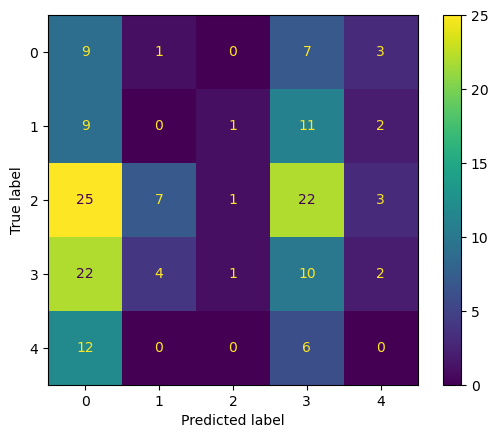

In [18]:
#
# Your code to display confusion matrix between predicted output and actual output
#
#
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

In [19]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy
kernels=['linear', 'poly', 'rbf', 'sigmoid' ]
accuracy=[]

for kernel in kernels:
  #
  #
  # Your code to compare the classifier for different Kernesls
  #
  #
    classifier = SVC(kernel = kernel,class_weight='balanced')
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

[0.2721518987341772, 0.189873417721519, 0.12658227848101267, 0.1962025316455696]


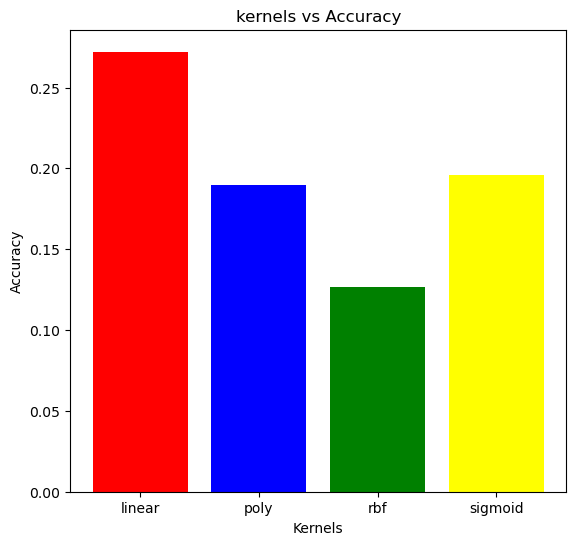

In [20]:
#
# Your code to plot accuracy vs kernels
#
print(accuracy)
plt.figure().set_figheight(6)
plt.bar(kernels,accuracy, color=["Red","blue","green","yellow"])
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.title("kernels vs Accuracy")
plt.show()

# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [21]:
classifier = SVC(kernel = 'linear',class_weight='balanced')
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
pres.append(precision_score(y_test, y_pred,average='macro'))
recall.append(recall_score(y_test, y_pred,average='macro' ))
f1.append(f1_score(y_test, y_pred,average='macro' ))


In [22]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, y_train)
knntrain_pred= knn.predict(X_train)
knntest_pred= knn.predict(X_test)

# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [23]:
#
#
# Your code to evaluate the classifer on test data
#
#
acc.append(accuracy_score(y_test, knntest_pred))
pres.append(precision_score(y_test, knntest_pred,average='macro'))
recall.append(recall_score(y_test, knntest_pred,average='macro' ))
f1.append(f1_score(y_test, knntest_pred,average='macro' ))

print("Accuracy test set: ", acc[2])
print("Precision test set: ", pres[2])
print("Recall test set: ", recall[2])
print("F-score test set: ", f1[2])

print (classification_report(y_test, knntest_pred))

Accuracy test set:  0.2974683544303797
Precision test set:  0.26124211705607053
Recall test set:  0.2488455772113943
F-score test set:  0.25155316228486957
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        20
           1       0.14      0.13      0.13        23
           2       0.44      0.41      0.43        58
           3       0.30      0.33      0.32        39
           4       0.12      0.17      0.14        18

    accuracy                           0.30       158
   macro avg       0.26      0.25      0.25       158
weighted avg       0.31      0.30      0.30       158



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [24]:
#
#
# Your code to evaluate the classifer on train data
#
#

print("Accuracy test set: ", accuracy_score(y_train, knntrain_pred))
print("Precision test set: ", precision_score(y_train, knntrain_pred,average='macro'))
print("Recall test set: ", recall_score(y_train, knntrain_pred,average='macro' ))
print("F-score test set: ", f1_score(y_train, knntrain_pred,average='macro' ))
print (classification_report(y_train, knntrain_pred))

Accuracy test set:  0.48945147679324896
Precision test set:  0.4647846928537465
Recall test set:  0.43997634310134315
F-score test set:  0.44467771349300705
              precision    recall  f1-score   support

           0       0.45      0.25      0.32        20
           1       0.39      0.46      0.42        39
           2       0.55      0.57      0.56        72
           3       0.54      0.61      0.57        64
           4       0.38      0.31      0.34        42

    accuracy                           0.49       237
   macro avg       0.46      0.44      0.44       237
weighted avg       0.49      0.49      0.48       237



# Display confusion matric between predicted and actual values.

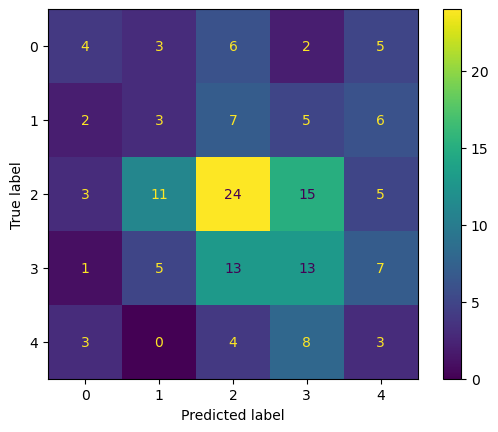

In [25]:
#
#
# Your code to display confusion matrix
#
#
cm = confusion_matrix(y_test, knntest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()


# Develop Logistic Regression-based classifier.

In [26]:
#
# Your code to develop logistic regression-based classifier
#

from sklearn.linear_model import LogisticRegression

regression= LogisticRegression( fit_intercept=True, solver='liblinear')
regression.fit(X_train,y_train)
regression_pred = regression.predict(X_test)
regression_trainpred = regression.predict(X_train)


# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [27]:
#
#
#
# Your code to evaluate the logistic regression classifier on test data
#
#
#
acc.append(accuracy_score(y_test, regression_pred))
pres.append(precision_score(y_test, regression_pred,average='macro'))
recall.append(recall_score(y_test, regression_pred,average='macro' ))
f1.append(f1_score(y_test, regression_pred,average='macro' ))

print("Accuracy test set: ", acc[3])
print("Precision test set: ", pres[3])
print("Recall test set: ", recall[3])
print("F-score test set: ", f1[3])

print (classification_report(y_test, regression_pred))

Accuracy test set:  0.34177215189873417
Precision test set:  0.30096889273985644
Recall test set:  0.282117402837043
F-score test set:  0.2753711864299856
              precision    recall  f1-score   support

           0       0.44      0.20      0.28        20
           1       0.12      0.04      0.06        23
           2       0.47      0.55      0.51        58
           3       0.23      0.28      0.26        39
           4       0.23      0.33      0.27        18

    accuracy                           0.34       158
   macro avg       0.30      0.28      0.28       158
weighted avg       0.33      0.34      0.32       158



# Display confusion matrix between predicted and actual values for logistic regression.

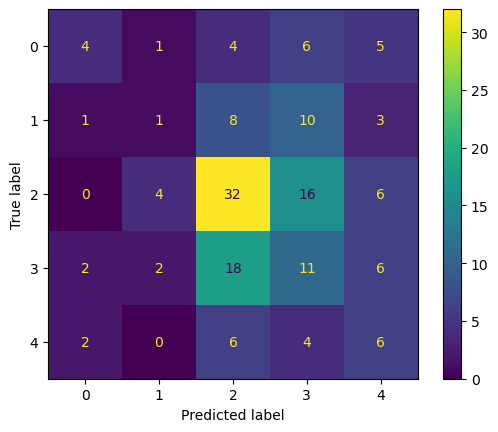

In [28]:
#
# Your code to display confusion matrix for logistic regression
#
cm = confusion_matrix(y_test, regression_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

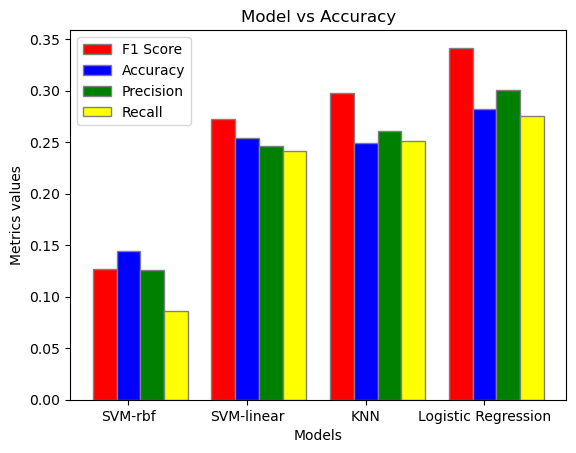

In [30]:
bar_width = 0.2
labels = ['SVM-rbf','SVM-linear', 'KNN', 'Logistic Regression']
# Your code to plot and compare the performance of different algorithms
r1 = np.arange(4)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# Create the bar plot
plt.bar(r1, acc, color='red', width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r2,recall, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r3, pres, color='green', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r4, f1, color='yellow', width=bar_width, edgecolor='grey', label='Recall')
plt.xlabel("Models")
plt.ylabel("Metrics values")
plt.title("Model vs Accuracy")
plt.xticks([r + bar_width for r in range(len(acc))], labels)
plt.legend()
plt.show()

    
### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

